# DESAFIO CODENATION  - 2019 #

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o Dicionário dos Microdados do Enem 2016.

Muitas universidades brasileiras utilizam o ENEM para selecionar seus futuros alunos e alunas. Isto é feito com uma média ponderada das notas das provas de matemática, ciências da natureza, linguagens e códigos, ciências humanas e redação, com os pesos abaixo:

In [1]:
from time import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split,  GridSearchCV

from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn.externals import joblib
from sklearn.tree import DecisionTreeRegressor

In [2]:
df_data = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_data.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [4]:
df_data = df_data.drop("Unnamed: 0", axis=1)
df_data.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,...,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,...,NaN,A,A,C,A,B,A,A,C,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,...,NaN,A,A,A,A,C,A,A,B,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,...,5.0,C,A,A,A,A,D,A,A,A
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,...,NaN,A,A,A,A,A,A,A,A,A


In [5]:
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


## Análise Exploratória ##

In [6]:
#Verificando se o conjunto de teste está dentro do conjunto de treino
print(set(df_test.columns).issubset(set(df_data.columns)))

True


In [7]:
#Salvando Numero de inscriçao
df_resposta = pd.DataFrame()
df_resposta = df_test['NU_INSCRICAO']
df_resposta = df_resposta.to_frame()

In [8]:
#Copiando o dataframe para realizar as alterações e preservar os dados originais
df = df_data
dft = df_test

#### Correlação ####

In [9]:
# Selecionar somente valores numéricos (inteiros e floats)
df = df.select_dtypes(include=['int64','float64'])

var = ['NU_NOTA_MT', 'NU_IDADE','IN_TREINEIRO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']
df[var].corr()

,NU_NOTA_MT,NU_IDADE,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
NU_NOTA_MT,1.000000,-0.061485,-0.022287,0.584941,0.529594,0.494695,0.379376
NU_IDADE,-0.061485,1.000000,-0.295091,-0.056171,-0.001611,-0.024979,-0.116125
IN_TREINEIRO,-0.022287,-0.295091,1.000000,-0.037874,-0.053460,-0.028261,-0.026328
NU_NOTA_CN,0.584941,-0.056171,-0.037874,1.000000,0.609543,0.545667,0.459938
NU_NOTA_CH,0.529594,-0.001611,-0.053460,0.609543,1.000000,0.692988,0.550582
NU_NOTA_LC,0.494695,-0.024979,-0.028261,0.545667,0.692988,1.000000,0.512908
NU_NOTA_REDACAO,0.379376,-0.116125,-0.026328,0.459938,0.550582,0.512908,1.000000


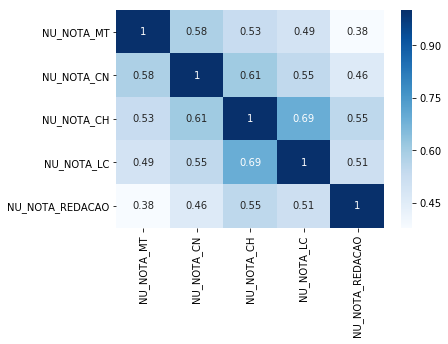

In [10]:
features = ['NU_NOTA_MT', 'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']
sns.heatmap(df[features].corr(), annot=True, linecolor='Black', cmap='Blues')
plt.xticks(rotation=90)
plt.show()

In [11]:
# Selecionar somente valores numéricos (inteiros e floats) - Teste
dft = dft.select_dtypes(include=['int64','float64'])

var = ['NU_IDADE','IN_TREINEIRO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']
dft[var].corr()

,NU_IDADE,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
NU_IDADE,1.000000,-0.293714,-0.105278,-0.048229,-0.079171,-0.161202
IN_TREINEIRO,-0.293714,1.000000,-0.009669,-0.032181,-0.004934,-0.014277
NU_NOTA_CN,-0.105278,-0.009669,1.000000,0.598574,0.545801,0.442692
NU_NOTA_CH,-0.048229,-0.032181,0.598574,1.000000,0.679993,0.537141
NU_NOTA_LC,-0.079171,-0.004934,0.545801,0.679993,1.000000,0.495745
NU_NOTA_REDACAO,-0.161202,-0.014277,0.442692,0.537141,0.495745,1.000000


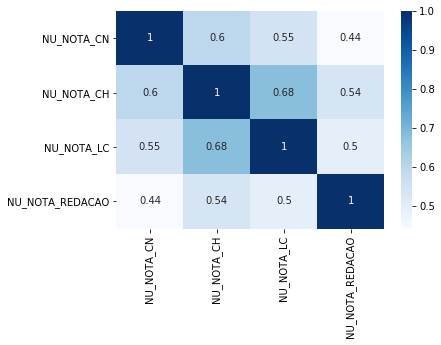

In [12]:
features = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']
sns.heatmap(dft[features].corr(), annot=True, linecolor='Black', cmap='Blues')
plt.xticks(rotation=90)
plt.show()

#### Ciências Naturais X Matemática ###

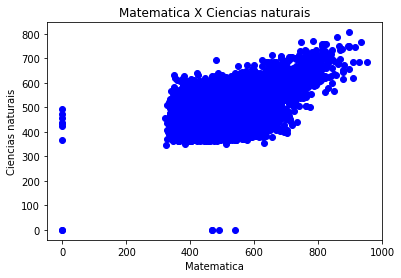

In [13]:
plt.scatter(df['NU_NOTA_MT'], df['NU_NOTA_CN'], color = 'blue')
plt.xlabel("Matematica")
plt.ylabel("Ciencias naturais")
plt.title("Matematica X Ciencias naturais")
plt.show()

In [14]:
zero_mt = df[(df.NU_NOTA_MT == 0)].index
df = df.drop(zero_mt, axis=0)

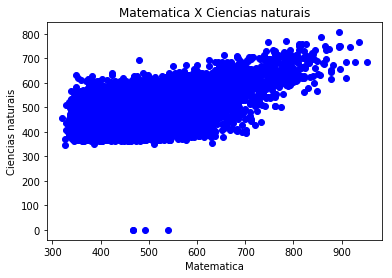

In [15]:
plt.scatter(df['NU_NOTA_MT'], df['NU_NOTA_CN'], color = 'blue')
plt.xlabel("Matematica")
plt.ylabel("Ciencias naturais")
plt.title("Matematica X Ciencias naturais")
plt.show()

In [16]:
zero_cn = df[(df.NU_NOTA_CN == 0)].index
df = df.drop(zero_cn, axis=0)

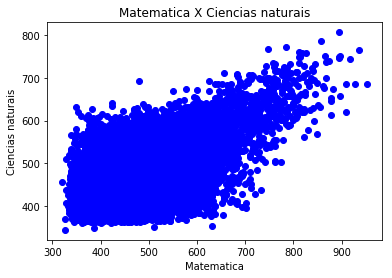

In [17]:
plt.scatter(df['NU_NOTA_MT'], df['NU_NOTA_CN'], color = 'blue')
plt.xlabel("Matematica")
plt.ylabel("Ciencias naturais")
plt.title("Matematica X Ciencias naturais")
plt.show()

In [18]:
#Verificação de dados faltantes
print("Dados faltantes de NU_NOTA_CN nos dados de treinamento:", df.NU_NOTA_CN.isnull().sum())
print("Dados faltantes de NU_NOTA_CN nos dados de teste:", dft.NU_NOTA_CN.isnull().sum())

Dados faltantes de NU_NOTA_CN nos dados de treinamento: 3388
Dados faltantes de NU_NOTA_CN nos dados de teste: 1134


In [19]:
df['NU_NOTA_CN'].fillna(-100.0, inplace=True)
dft['NU_NOTA_CN'].fillna(-100.0, inplace=True)

c:\python37\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [20]:
#Verificação de dados faltantes
print("Dados faltantes de NU_NOTA_CN nos dados de treinamento:", df.NU_NOTA_CN.isnull().sum())
print("Dados faltantes de NU_NOTA_CN nos dados de teste:", dft.NU_NOTA_CN.isnull().sum())

Dados faltantes de NU_NOTA_CN nos dados de treinamento: 0
Dados faltantes de NU_NOTA_CN nos dados de teste: 0


#### Ciências Humanas X Matemática ####

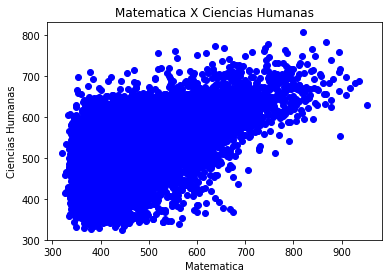

In [21]:
plt.scatter(df['NU_NOTA_MT'], df['NU_NOTA_CH'], color = 'blue')
plt.xlabel("Matematica")
plt.ylabel("Ciencias Humanas")
plt.title("Matematica X Ciencias Humanas")
plt.show()

In [22]:
#Verificação de dados faltantes
print("Dados faltantes de NU_NOTA_CH nos dados de treinamento:", df.NU_NOTA_CH.isnull().sum())
print("Dados faltantes de NU_NOTA_CH nos dados de teste:", dft.NU_NOTA_CH.isnull().sum())

Dados faltantes de NU_NOTA_CH nos dados de treinamento: 3388
Dados faltantes de NU_NOTA_CH nos dados de teste: 1134


In [23]:
df['NU_NOTA_CH'].fillna(-100.0, inplace=True)
dft['NU_NOTA_CH'].fillna(-100.0, inplace=True)

In [24]:
#Verificação de dados faltantes
print("Dados faltantes de NU_NOTA_CH nos dados de treinamento:", df.NU_NOTA_CH.isnull().sum())
print("Dados faltantes de NU_NOTA_CH nos dados de teste:", dft.NU_NOTA_CH.isnull().sum())

Dados faltantes de NU_NOTA_CH nos dados de treinamento: 0
Dados faltantes de NU_NOTA_CH nos dados de teste: 0


#### Letras e Códigos X Matemática ####

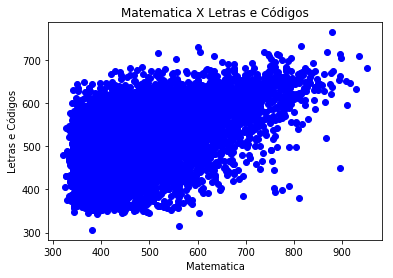

In [25]:
plt.scatter(df['NU_NOTA_MT'], df['NU_NOTA_LC'], color = 'blue')
plt.xlabel("Matematica")
plt.ylabel("Letras e Códigos")
plt.title("Matematica X Letras e Códigos")
plt.show()

In [26]:
#Verificação de dados faltantes
print("Dados faltantes de NU_NOTA_LC nos dados de treinamento:", df.NU_NOTA_LC.isnull().sum())
print("Dados faltantes de NU_NOTA_LC nos dados de teste:", dft.NU_NOTA_LC.isnull().sum())

Dados faltantes de NU_NOTA_LC nos dados de treinamento: 3596
Dados faltantes de NU_NOTA_LC nos dados de teste: 1199


In [27]:
df['NU_NOTA_LC'].fillna(-100.0, inplace=True)
dft['NU_NOTA_LC'].fillna(-100.0, inplace=True)

In [28]:
#Verificação de dados faltantes
print("Dados faltantes de NU_NOTA_LC nos dados de treinamento:", df.NU_NOTA_LC.isnull().sum())
print("Dados faltantes de NU_NOTA_LC nos dados de teste:", dft.NU_NOTA_LC.isnull().sum())

Dados faltantes de NU_NOTA_LC nos dados de treinamento: 0
Dados faltantes de NU_NOTA_LC nos dados de teste: 0


#### Redação X Matemática ####

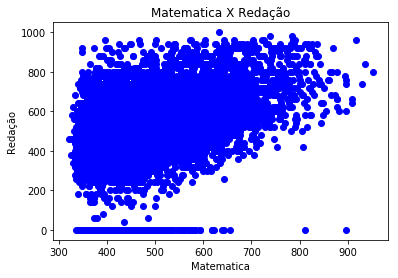

In [29]:
plt.scatter(df['NU_NOTA_MT'], df['NU_NOTA_REDACAO'], color = 'blue')
plt.xlabel("Matematica")
plt.ylabel("Redação")
plt.title("Matematica X Redação")
plt.show()

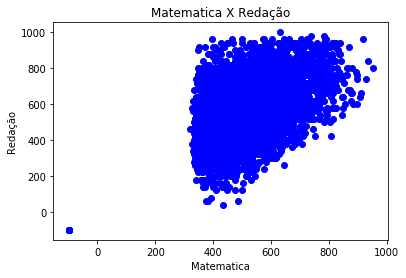

In [47]:
#redacao_zero = df[(df.NU_NOTA_REDACAO == 0)].index
#df = df.drop(redacao_zero, axis=0)
#plt.scatter(df['NU_NOTA_MT'], df['NU_NOTA_REDACAO'], color = 'blue')
#plt.xlabel("Matematica")
#plt.ylabel("Redação")
#plt.title("Matematica X Redação")
#plt.show()

In [30]:
#Verificação de dados faltantes
print("Dados faltantes de NU_NOTA_REDACAO nos dados de treinamento:", df.NU_NOTA_REDACAO.isnull().sum())
print("Dados faltantes de NU_NOTA_REDACAO nos dados de teste:", dft.NU_NOTA_REDACAO.isnull().sum())

Dados faltantes de NU_NOTA_REDACAO nos dados de treinamento: 3596
Dados faltantes de NU_NOTA_REDACAO nos dados de teste: 1199


In [31]:
df['NU_NOTA_REDACAO'].fillna(-100.0, inplace=True)
dft['NU_NOTA_REDACAO'].fillna(-100.0, inplace=True)

In [32]:
#Verificação de dados faltantes
print("Dados faltantes de NU_NOTA_REDACAO nos dados de treinamento:", df.NU_NOTA_REDACAO.isnull().sum())
print("Dados faltantes de NU_NOTA_REDACAO nos dados de teste:", dft.NU_NOTA_REDACAO.isnull().sum())

Dados faltantes de NU_NOTA_REDACAO nos dados de treinamento: 0
Dados faltantes de NU_NOTA_REDACAO nos dados de teste: 0


#### Matematica ####

In [33]:
#Verificação de dados faltantes
print("Dados faltantes de NU_NOTA_MT nos dados de treinamento:", df.NU_NOTA_MT.isnull().sum())
df['NU_NOTA_MT'].fillna(-100.0, inplace=True)
print("Dados faltantes de NU_NOTA_MT nos dados de treinamento:", df.NU_NOTA_MT.isnull().sum())

Dados faltantes de NU_NOTA_MT nos dados de treinamento: 3596
Dados faltantes de NU_NOTA_MT nos dados de treinamento: 0


## Modelos ##

In [48]:
#Variavel alvo
y = df['NU_NOTA_MT']

In [49]:
#Dados para treinamento do modelo
features = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']
x_train = df[features]

In [50]:
x_test = dft[features]

#### Random Forest ####

In [37]:
#n_estimators=200 (nº de nós), n_jobs=-1 (processar tudo), warm_start=True (mantém o aprendizado e reprocessa o modelo, melhorando-o)
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=200, n_jobs=-1, warm_start=True))

In [66]:
# max_features : O número de features a considerar quando pesquisar pela melhor separação
# max_depth :  Profundidade máxima da árvore de decisão.
hyperparameters = {'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                   'randomforestregressor__max_depth': [None, 11, 9, 7, 5, 3, 1]}

In [67]:
# Ajustar e sintonizar o modelo
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
clf.fit(x_train, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decr...mators=200, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=True))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'], 'randomforestregressor__max_depth': [None, 11, 9, 7, 5, 3, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
print(clf.best_params_)

{'randomforestregressor__max_depth': 7, 'randomforestregressor__max_features': 'log2'}


In [69]:
pred_notas = clf.predict(x_test)

In [42]:
df_resposta['NU_NOTA_MT'] = np.around(pred_notas,2)

In [70]:
#Salvando Numero de inscriçao
#df_resposta1 = pd.DataFrame()
#df_resposta1 = df_resposta['NU_INSCRICAO']
#df_resposta1 = df_resposta1.to_frame()
#df_resposta1['NU_NOTA_MT'] = np.around(pred_notas,2)

In [71]:
#Exemplo de respostas
pred_notas

array([ 431.35771594,  450.53835827,  587.75453561, ...,  676.06892837,
        450.76086841, -100.        ])

In [72]:
len(np.unique(pred_notas))

3369

In [46]:
df_resposta.to_csv('answer.csv', index=False, header=True)

In [ ]:
#df_resposta1.to_csv('answer.csv', index=False, header=True)

O modelo acima obteve um score de 93.62%